In [1]:
# Importe libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Use pandas library to get CSV file
data = pd.read_csv(r"Heart_Disease_data.csv")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
data.shape

(1025, 14)

In [5]:
data.size

14350

In [6]:
# columns name
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
# use isnull() and sum() to check how many columns have null values
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

***There is no missing values in this dataset.***

---

***Attribute Information:***
```
age

sex: The person's sex (1 = male, 0 = female)

chest pain type (4 values) Value 0: asymptomatic; Value 1: atypical angina; Value 2: non-anginal pain; Value 3: typical angina

resting blood pressure

serum cholesterol in mg/dl

fasting blood sugar > 120 mg/dl

resting electrocardiographic results (values 0,1,2) 0 = normal; 1 = ST-T wave abnormality; 2 = left ventricular hypertrophy by the criteria of Estes

thalach: maximum heart rate achieved

exang: exercise-induced angina

oldpeak = ST depression induced by exercise relative to rest
the slope of the peak exercise ST segment

number of major vessels (0-3) colored by fluoroscopy

thal: 0 = normal; 1 = fixed defect; 2 = normal blood flow ;3 = reversable defect

target: Heart disease (1 = no, 0= yes)
```

---

In [8]:
def gender(row):
    if row == 1:
        return "Male"
    elif row == 0:
        return "Female"

In [9]:
data['Gender'] = data["sex"].apply(gender)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Gender
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Male
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Male
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Male
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,Male
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,Female


In [10]:
def Heart_Disease(row):
    if row == 1:
        return "No Heart Disease"
    elif row == 0:
        return "Have Heart Disease"

In [11]:
data['Heart_Disease'] = data['target'].apply(Heart_Disease)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Gender,Heart_Disease
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Male,Have Heart Disease
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Male,Have Heart Disease
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Male,Have Heart Disease
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,Male,Have Heart Disease
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,Female,Have Heart Disease


In [12]:
hd = data.groupby('Heart_Disease')['target'].count()
hd

Heart_Disease
Have Heart Disease    499
No Heart Disease      526
Name: target, dtype: int64

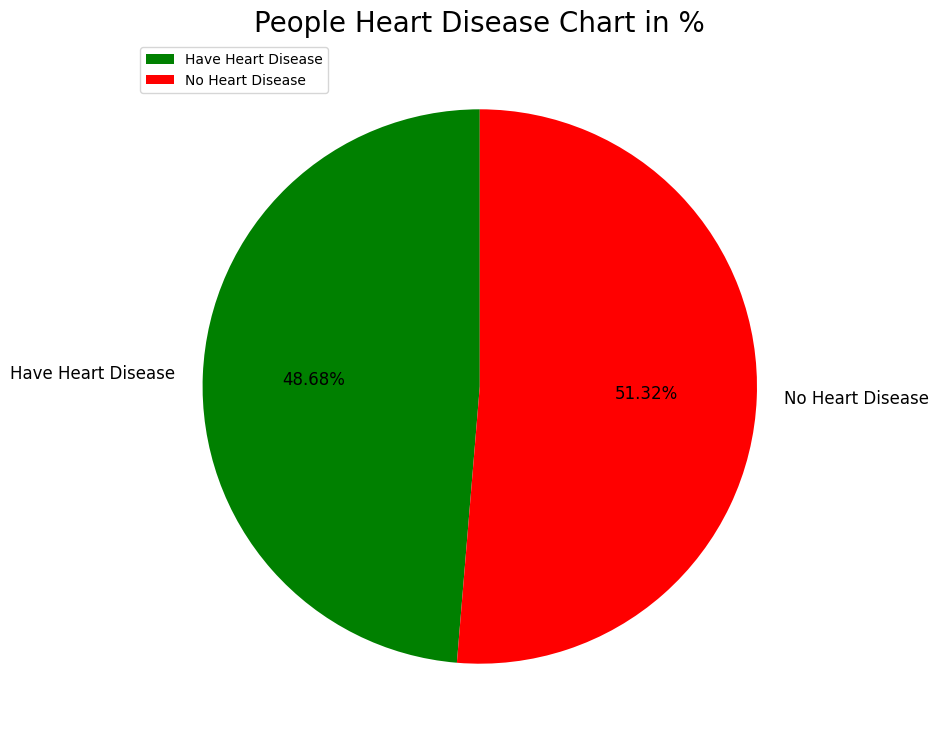

In [13]:
plt.figure(figsize=(15,9))
labels=['Have Heart Disease','No Heart Disease']
colors=['green','red']
plt.pie(hd, labels=labels, colors=colors, autopct="%0.2f%%", shadow=False, textprops={'fontsize':12},startangle=90)
plt.title("People Heart Disease Chart in %", fontsize=20)
plt.legend(ncol=1, loc='upper left')
plt.show()

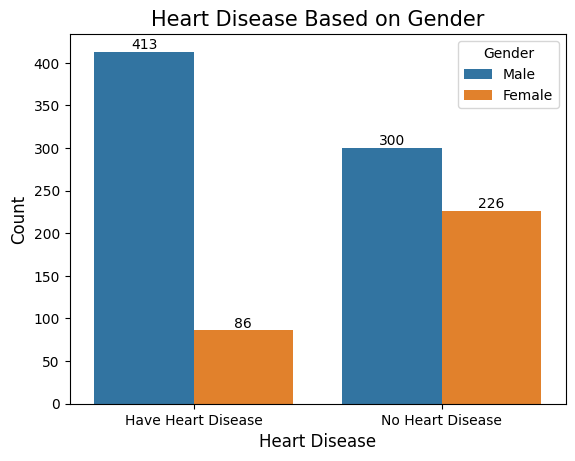

In [14]:
# Heart Disease by Gender
#plt.figure(figsize=(10,8))
hdg=sns.countplot(x=data['Heart_Disease'],data=data, hue='Gender')

for bar in hdg.containers:
    hdg.bar_label(bar)

plt.xlabel("Heart Disease", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Heart Disease Based on Gender", fontsize=15, )
plt.show()

**As We Can See Men exhibit a higher susceptibility to heart disease.**

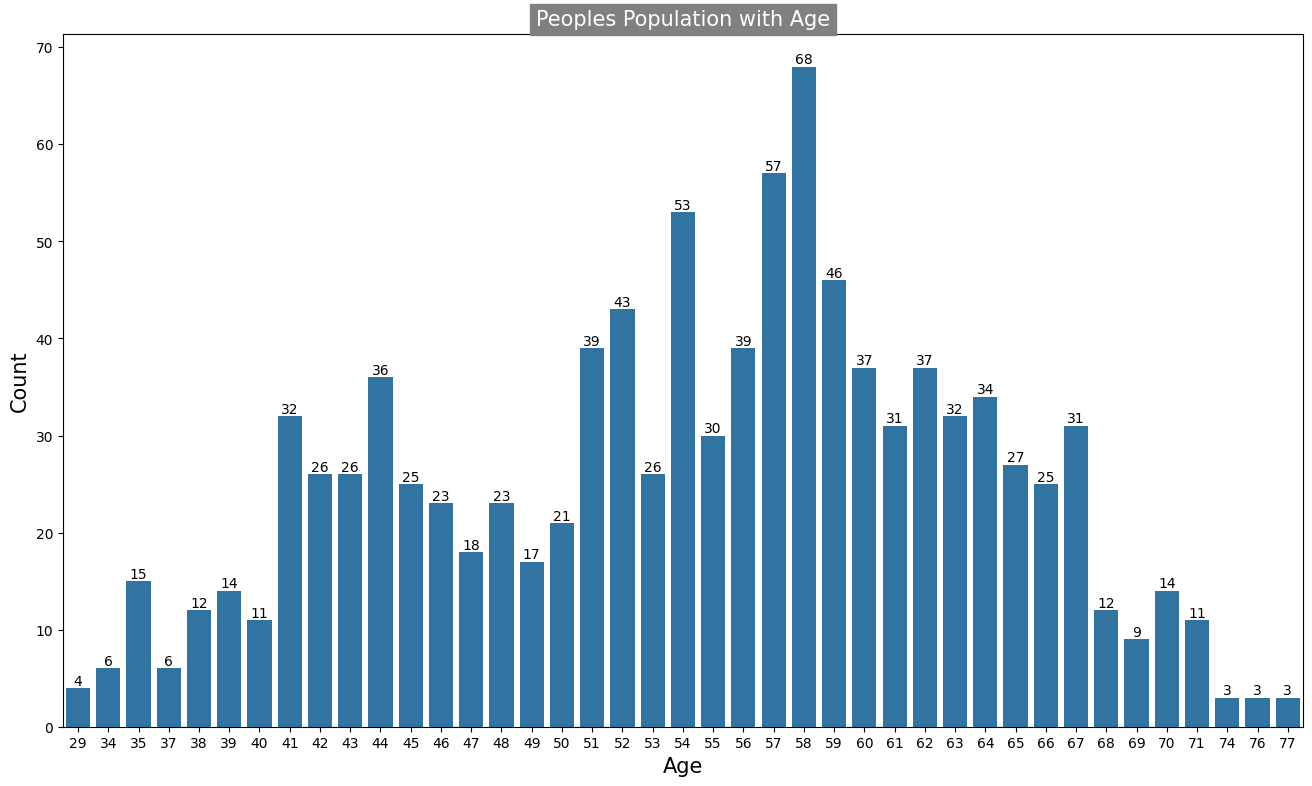

In [15]:
# Now creating countplot using matplotlib and seaborn
plt.figure(figsize=(16,9))

df=sns.countplot(data=data, x="age")

for bar in df.containers:
    df.bar_label(bar)

plt.title("Peoples Population with Age", fontsize='15',color="white",backgroundcolor='grey')
plt.xlabel('Age',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

In [16]:

min_age = data['age'].min()
max_age = data['age'].max()
mean_age = data['age'].mean()

print("Minimum Age =",min_age)
print("Maximum Age =",max_age)
print("Mean Age =",mean_age)

Minimum Age = 29
Maximum Age = 77
Mean Age = 54.43414634146342


In [17]:
# Divide age groups for heart disease

def age_range(row):
    if row >= 29 and row <40:
        return 'Young Age Person'
    elif row >= 40 and row <55:
        return 'Middle Age Person'
    elif row >=55:
        return 'Older Age Person'

In [18]:
data['Age_range'] = data['age'].apply(age_range)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Gender,Heart_Disease,Age_range
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Male,Have Heart Disease,Middle Age Person
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Male,Have Heart Disease,Middle Age Person
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Male,Have Heart Disease,Older Age Person
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,Male,Have Heart Disease,Older Age Person
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,Female,Have Heart Disease,Older Age Person


In [19]:
# count age range person
df= data.groupby('Age_range')['age'].count()
df

Age_range
Middle Age Person    419
Older Age Person     549
Young Age Person      57
Name: age, dtype: int64

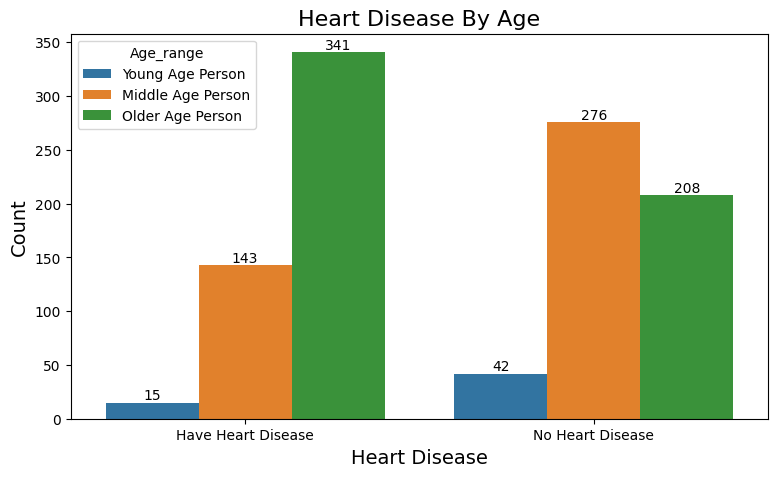

In [20]:
# Heart disease by Age. using MatplotLib and Seaborn
plt.figure(figsize=(9,5))

hue_order=['Young Age Person','Middle Age Person','Older Age Person']
hdar=sns.countplot(x=data['Heart_Disease'], data=data, hue='Age_range', hue_order=hue_order)

for bar in hdar.containers:
    hdar.bar_label(bar)

plt.title('Heart Disease By Age', fontsize=16)
plt.xlabel('Heart Disease', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

**As we can see most old age person Have Heart Disease and most middle age persons are No Heart Disease**

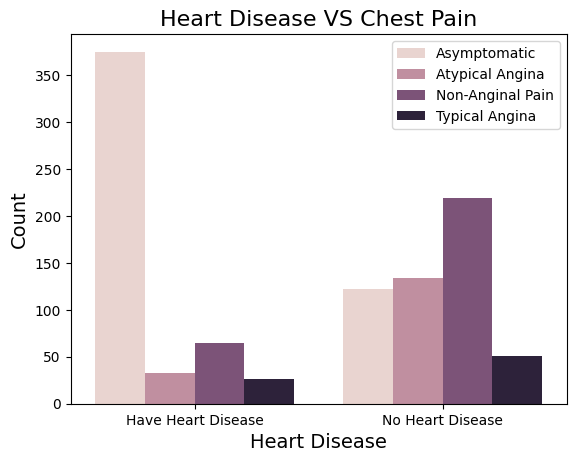

In [21]:
# Heart disease by Chest Pain. using MatplotLib and Seaborn 

hue_order = ['asymptomatic','atypical angina','non-anginal pain','typical angina']
cp = sns.countplot(x=data['Heart_Disease'], data=data, hue='cp', hue_order=hue_order)
plt.xlabel('Heart Disease',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.title('Heart Disease VS Chest Pain',fontsize= 16)
plt.legend(labels = ['Asymptomatic', 'Atypical Angina','Non-Anginal Pain','Typical Angina'])
plt.show()

**Most of the Heart Disease patients are found to have Asymptomatic chest pain.**

`An asymptomatic heart attack increases the risk of having another heart attack, which could be deadly. Having another heart attack also increases the risk of complications, such as heart failure`

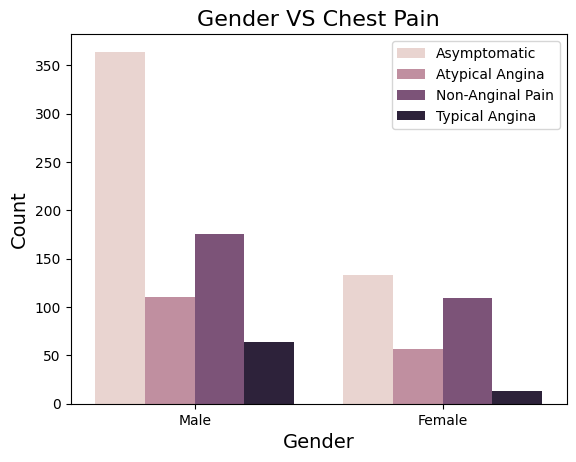

In [22]:
# Chest Pain by Gender. using MatplotLib and Seaborn 
hue_order = ['asymptomatic','atypical angina','non-anginal pain','typical angina']
sns.countplot(x=data['Gender'], data=data, hue='cp', hue_order=hue_order)
plt.xlabel('Gender',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.title('Gender VS Chest Pain', fontsize= 16)
plt.legend(labels = ['Asymptomatic', 'Atypical Angina','Non-Anginal Pain','Typical Angina'])
plt.show()

**Maximum No. of Males have Asymptomatic chest pain and they have a high risk of Heart Attack**



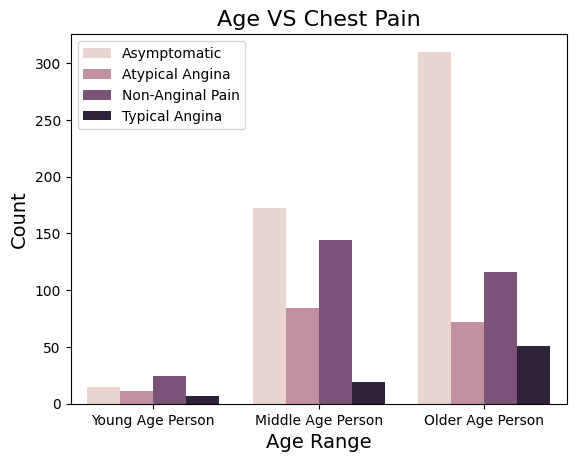

In [23]:
# Chest Pain by Age. using MatplotLib and Seaborn 
order=['Young Age Person','Middle Age Person','Older Age Person']
sns.countplot(x=data['Age_range'], data=data, hue='cp', order=order)
plt.legend(labels = ['Asymptomatic', 'Atypical Angina','Non-Anginal Pain','Typical Angina'])
plt.xlabel('Age Range',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.title('Age VS Chest Pain',fontsize= 16)
plt.show()

**Maximum No. of Old Age Person have Asymptomatic chest pain.**

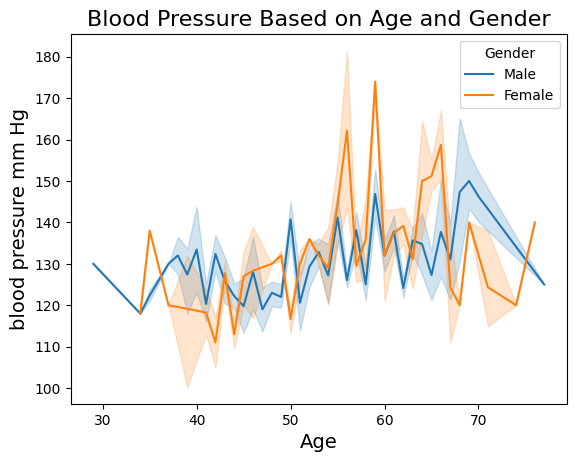

In [24]:
# Made a line plot to find how many males and females have blood pressure based on their age. using MatplotLib and Seaborn 
sns.lineplot(data=data, x=data['age'],y=data['trestbps'], hue='Gender')
plt.xlabel('Age',fontsize=14)
plt.ylabel('blood pressure mm Hg',fontsize=14)
plt.title('Blood Pressure Based on Age and Gender',fontsize=16)
plt.show()

**As we can see In both males and females after the age of 50 blood pressure is increased. But females have high blood pressure as compared to males**
**Also Uncontrolled high blood pressure can lead to complications including Heart attack or stroke**

`*Note: Healthy blood pressure for men of age 18-39 is 119/70 mm Hg and that of women is 110/68 mm Hg. Healthy blood pressure for men aged 40-56 is 124/77 mm Hg and that of women is 122/74 mm Hg. Healthy blood pressure for men of age 60+ is 133/69 mm Hg and that of women is 139/68 mm Hg.*`

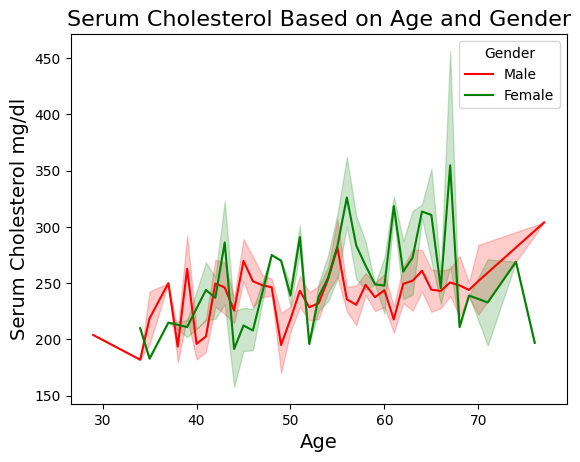

In [25]:
# Made a line plot to find how many males and females have Serum Cholesterol based on their age. using MatplotLib and Seaborn 

sns.lineplot(data=data, x=data['age'],y=data['chol'], hue='Gender',palette=['r', 'g'])
plt.xlabel('Age',fontsize=14)
plt.ylabel('Serum Cholesterol mg/dl',fontsize=14)
plt.title('Serum Cholesterol Based on Age and Gender',fontsize=16)
plt.show()


**Females have high Serum Cholesterol as compared to males and it incresse after age of 50-55**

`Note: Healthy Serum Cholesterol less than 200 mg/dL`

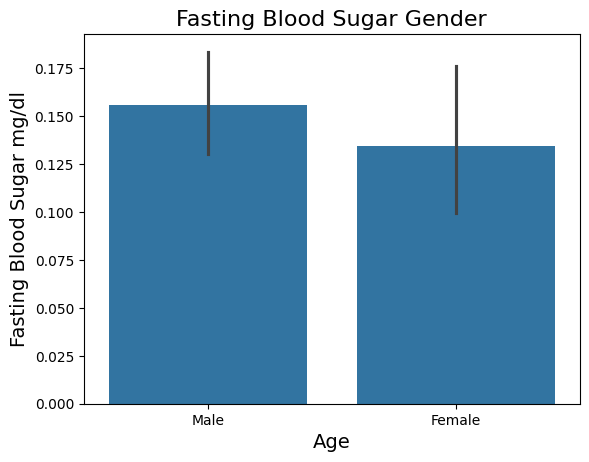

In [26]:
# Fasting blood sugar based on Gender. using MatplotLib and Seaborn 
sns.barplot(data=data,x='Gender',y=data['fbs'])
plt.xlabel('Age',fontsize=14)
plt.ylabel('Fasting Blood Sugar mg/dl',fontsize=14)
plt.title('Fasting Blood Sugar Gender',fontsize=16)
plt.show()

**Male have high Fasting blood sugar which is > 120 mg/dl**

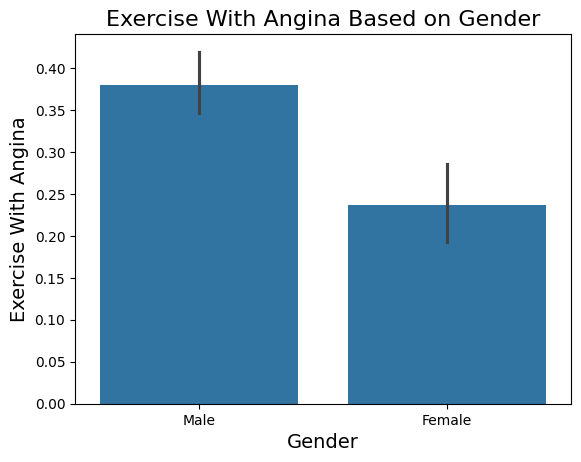

In [27]:
# exercise-induced angina.using MatplotLib and Seaborn 
sns.barplot(data=data, x='Gender',y=data['exang'])
plt.xlabel('Gender',fontsize=14)
plt.ylabel('Exercise With Angina',fontsize=14)
plt.title('Exercise With Angina Based on Gender',fontsize=16)
plt.show()

**Males have high Exercise Angina As compared to Females**

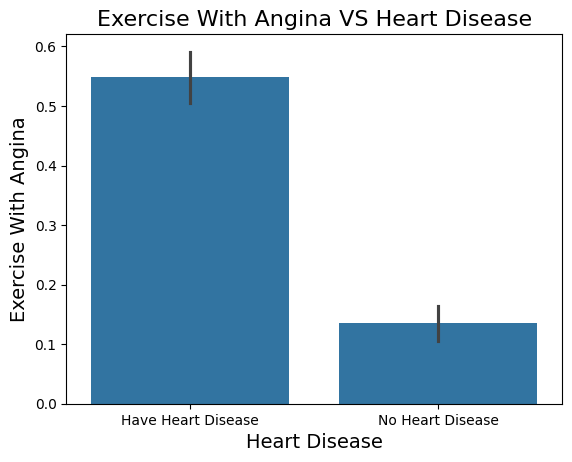

In [28]:
# Exercise With Angina based on Heart Disease. using MatplotLib and Seaborn 
sns.barplot(data=data, x='Heart_Disease',y=data['exang'])
plt.xlabel('Heart Disease',fontsize=14)
plt.ylabel('Exercise With Angina',fontsize=14)
plt.title('Exercise With Angina VS Heart Disease',fontsize=16)
plt.show()

**Angina sufferers often fear exercise exacerbating their symptoms due to increased strain on the heart, potentially triggering chest pain or discomfort.**

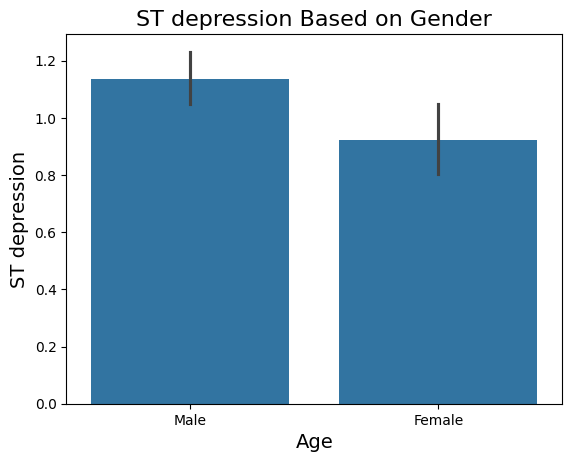

In [29]:
# ST depression induced by exercise. 
sns.barplot(data=data, x='Gender',y='oldpeak')
plt.xlabel('Age',fontsize=14)
plt.ylabel('ST depression',fontsize=14)
plt.title('ST depression Based on Gender',fontsize=16)
plt.show()


**Males exhibit a higher to ST depression compared to females.**

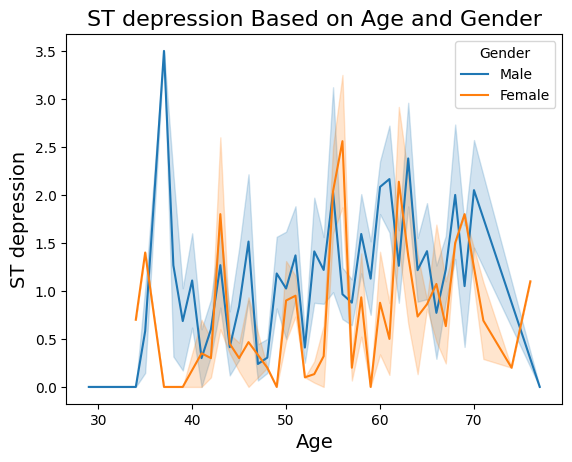

In [30]:
sns.lineplot(x='age', y='oldpeak', data=data, color='g', hue='Gender')
plt.xlabel('Age', fontsize=14)
plt.ylabel('ST depression', fontsize=14)
plt.title('ST depression Based on Age and Gender',fontsize=16)
plt.show()

**Males exhibit a higher susceptibility to ST depression compared to females.**